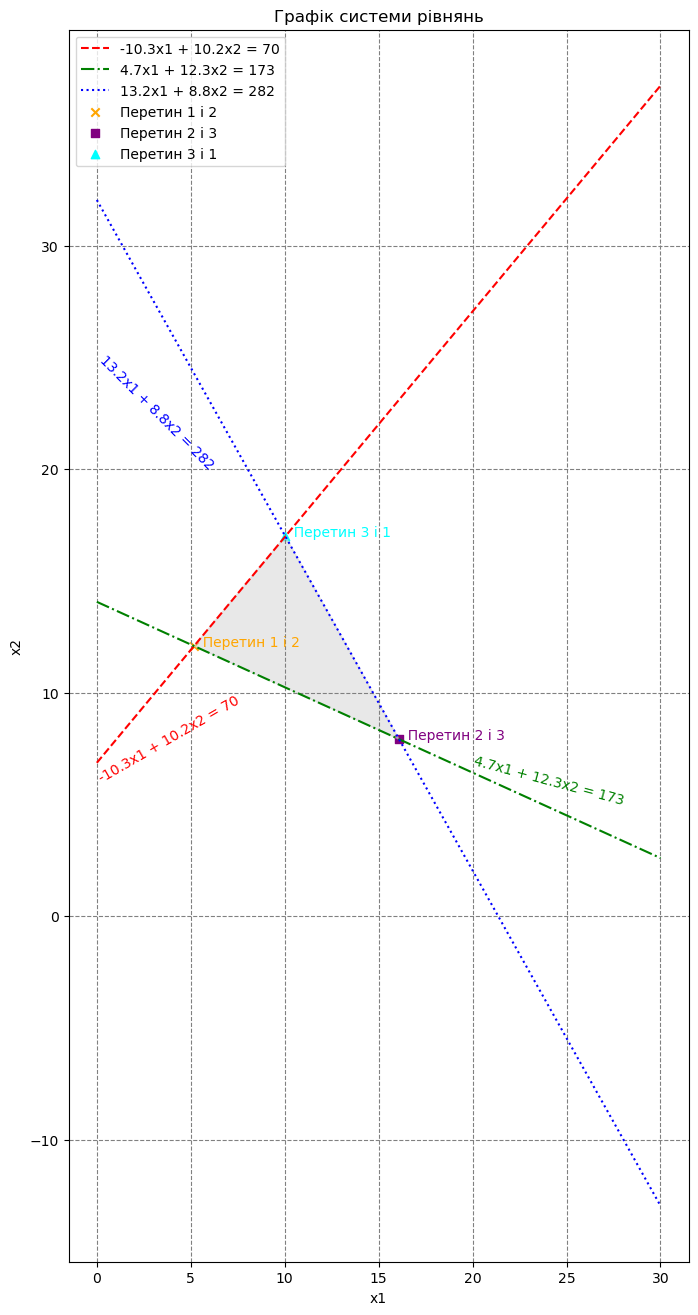

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задані системи рівнянь
A = np.array([[-10.3, 10.2], [4.7, 12.3], [13.2, 8.8]])
B = np.array([70, 173, 282])

# Розв'язання системи лінійних рівнянь
solution = np.linalg.lstsq(A, B, rcond=None)[0]

# Відображення графіків ліній та точки перетину
x1 = np.linspace(0, 30, 100)
x2_1 = (70 + 10.3 * x1) / 10.2
x2_2 = (173 - 4.7 * x1) / 12.3
x2_3 = (282 - 13.2 * x1) / 8.8

# Знаходження точок перетину між рівняннями
intersection_12 = np.linalg.lstsq(np.vstack([A[0], A[1]]), np.hstack([B[0], B[1]]), rcond=None)[0]
intersection_23 = np.linalg.lstsq(np.vstack([A[1], A[2]]), np.hstack([B[1], B[2]]), rcond=None)[0]
intersection_31 = np.linalg.lstsq(np.vstack([A[2], A[0]]), np.hstack([B[2], B[0]]), rcond=None)[0]

# Визначення вершин трикутника для заливки
triangle_vertices = np.array([intersection_12, intersection_23, intersection_31])

plt.figure(figsize=(8, 16), dpi=100)

plt.plot(x1, x2_1, color='red', linestyle='dashed', label='-10.3x1 + 10.2x2 = 70')
plt.plot(x1, x2_2, color='green', linestyle='dashdot', label='4.7x1 + 12.3x2 = 173')
plt.plot(x1, x2_3, color='blue', linestyle='dotted', label='13.2x1 + 8.8x2 = 282')

plt.scatter(intersection_12[0], intersection_12[1], color='orange', marker='x', label='Перетин 1 і 2')
plt.scatter(intersection_23[0], intersection_23[1], color='purple', marker='s', label='Перетин 2 і 3')
plt.scatter(intersection_31[0], intersection_31[1], color='cyan', marker='^', label='Перетин 3 і 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Графік системи рівнянь')
plt.legend()
plt.grid(True, linestyle='--', color='gray')

# Заповнення трикутника
plt.fill(triangle_vertices[:, 0], triangle_vertices[:, 1], color='lightgray', alpha=0.5)

# Підписи рівнянь прямих
plt.text(0, 6, '-10.3x1 + 10.2x2 = 70', color='red', rotation=30)
plt.text(20, 5, '4.7x1 + 12.3x2 = 173', color='green', rotation=-15)
plt.text(0, 20, '13.2x1 + 8.8x2 = 282', color='blue', rotation=-45)

# Вказівки на точки перетину
plt.text(intersection_12[0], intersection_12[1], '  Перетин 1 і 2', color='orange')
plt.text(intersection_23[0], intersection_23[1], '  Перетин 2 і 3', color='purple')
plt.text(intersection_31[0], intersection_31[1], '  Перетин 3 і 1', color='cyan')

plt.savefig('plot.jpg')

plt.show()
